<a href="https://colab.research.google.com/github/iSanoussi/Classes-and-tests/blob/main/Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vecteurs et représentations
## Exemple par le traitement du son

### I. Import d'un fichier son

Le son émis par votre enceinte est enregistré numérisé dans un fichier et doit être retranscrit en une action mécanique (vibration de la membrane de l'enceinte) via des impulsions électriques.

C'est le travail de la carte son d'interprèter les octets fournis numériquement en impulsions électriques provoquant le mouvement mécanique de la membrane. La carte son donne le rythme auquel chaque octet (dans le codage wav le plus simple) devient une impulsion. Ceci exploite l'information du **samplerate** contenue dans le fichier.

In [ ]:
from scipy.io import wavfile
# 2 informations sont renvoyées par la fonction wavfile
# le samplerate, et un tableau Numpy des intensités sonores par unité de temps
samplerate, data = wavfile.read('violin_G4.wav')

In [ ]:
data.shape

(172900,)

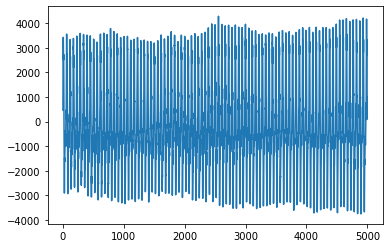

In [ ]:
# Nous pouvons utiliser Pyplot pour visualiser les données sonores
from matplotlib import pyplot as plt

plt.plot(data[50000:55000])

In [ ]:
# La valeur du samplerate nous permets de connaître le nombre d'octets par secondes
samplerate

22050

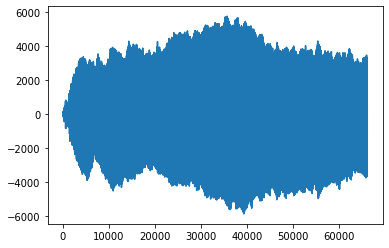

In [ ]:
# Nous voulons extraire du son plus propre du fichier en nous aidant de la
# représentation graphique

import numpy as np

debut = 32000
fin = debut + samplerate * 3
intervalle = fin - debut

subsample = data[debut:fin]

plt.plot(subsample)

### II. Les fonctions trigonométriques plutôt que le tableau de valeurs

Nous voyons que quelques secondes de fichiers nécessitent beaucoup de valeurs. Heureusement, vous disposez de formats compressés (mp3 par exemple) pour gagner énormément d'espace (et vous en profitez tous les jours). Une façon de compresser l'information sonore est via la théorie de **Fourier**. Nous allons l'aborder de façon simplifier. **Ceci permettra de condenser l'information en quelques vecteurs** et introduire la notion d'**espace vectoriel**.

### Les fonctions sinus et cosinus comme base vectorielle

L'idée de base des **séries de Fourier** est d'utiliser les fonctions trigonométriques comme **base de fonctions**. C'est à dire que nous allons utiliser une famille de fonction, et les déshabiller de toutes leurs propriétés analytiques (ne plus nous préocuper de leurs valeurs) et les considérer comme des objets fixes lorsque nous effectuons des manipulations algébriques.

Cependant, il est quand même nécessaire pour formaliser le problème de conversion *fichier son octet par octet* -> *codage vectoriel* d'exploiter ce que l'on sait des fonctions exploitées. Examinons donc les fonctions trigonométriques :

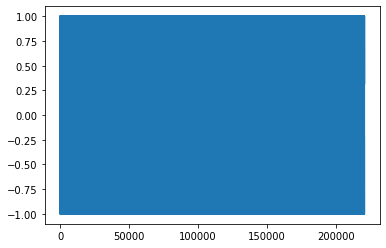

In [ ]:
# Pour obtenir une fonction trigonométrique, sin ou cos, qui effectue
# une oscillation par seconde, il faut qu'elle prenne la valeur 0 en 0,
# et 2pi en x = samplerate

k = 440 # pour k donné, nous aurons k oscillations, soit une fréquence k Hz
f = lambda x : np.cos(2* k * np.pi * x / samplerate)
g = lambda x : np.sin(2* k * np.pi * x / samplerate)

X = np.arange(samplerate*10)
Y = f(X)

plt.plot(X, Y)

In [ ]:
# Nous pouvons enregistrer le son produit via wavfile
# Le tableau de valeurs à enregistrer doit être composé d'entiers 16bits
# Les min et max sont +-32768

wavfile.write('my_sound.wav', samplerate, (Y * 22000).astype('int16'))

### Lorsque l'on combine les fonctions

Lorsque l'on utilise une seule fonction trigonométrique, nous obtenons des sons purs. On pourrait donc déjà envisager de déterminer une famille finie de fonctions en guise de notes, et de les exploiter dans un codage à la façon d'une partition de musique. Cependant, nous pouvons faire davantage en combinant ces fonctions entre elles.

Examinons graphiquement ce qui apparaît en sommant des sinus de valeurs voisines

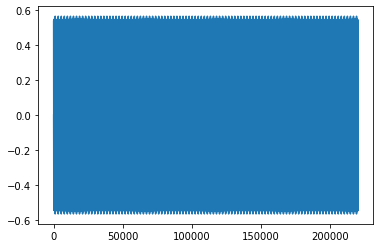

In [ ]:
# nous traçons les valeurs d'une combinaison d'une fréquence et 2 voisines qui l'entourent

k = 440
g = lambda x : np.sin(2* k * np.pi * x / samplerate)
h = lambda x : np.sin(2* (k + 20) * np.pi * x / samplerate)
i = lambda x : np.sin(2* k* (k - 20) * np.pi * x / samplerate)

X = np.arange(samplerate*10)
Y =  (0.2*g(X) + 1*h(X) - 0.5*i(X))/3

plt.plot(X, Y)

In [ ]:
# Vous pouvez écouter le résultat
wavfile.write('my_sound.wav', samplerate, (Y * 22000).astype('int16'))

### Combinaisons arbitraires de fonctions trigonométriques

**Nous pouvons combiner un nombre arbitraire de fonctions trigonométriques**. Nous fixons les fonctions qui nous intéresse, et ne traitons plus que les coefficients apparaissant dans leur **combinaison linéaire**.

**Une contrainte cependant!** De la même façon qu'une image a des limites en x et y, le format impose des bornes pour l'intensité du résultat. **Il faut donc s'assurer de ne pas être hors de ce rayon, sinon le son sature!**

In [ ]:
# Choisissez différentes fréquences à combiner, et écoutez le résultat
g = lambda x : np.sin(2* 440 * np.pi * x / samplerate)
h = lambda x : np.sin(2* 550 * np.pi * x / samplerate)
i = lambda x : np.sin(2* 330 * np.pi * x / samplerate)
j = lambda x : np.sin(2* 600 * np.pi * x / samplerate)
k = lambda x : np.sin(2* 300 * np.pi * x / samplerate)

X = np.arange(samplerate * 10) # Modifiez le multiplicateur pour un échantillon de durée différente

Y =  (-0.4* g(X) + 0.6* h(X) + 0.8 * i(X) + 1 * j(X) + 1.2 * k(X))

In [ ]:
print(f"Max de Y : {Y.max()}" )
print(f"Min de Y : {Y.min()}" )

Max de Y : 3.539418012971944
Min de Y : -3.5394180129687465


In [ ]:
# Utilisez les méthodes min et max pour vérifier les bornes atteintes par vos sons
wavfile.write('my_sound.wav', samplerate, (Y * 30000 / Y.max()).astype('int16'))

### Transformée de Fourier d'un échantillon

Nous avons vu comment synthétiser des sons à partir d'une famille finie de fonctions trigonométriques. Cependant nous n'avons pas encore vu comment reproduire un son existant avec ces fonctions. Ce sera l'objet de la théorie de Fourier.

Dans celle-ci, **nous choisissons une période T, prenons des fréquences multiples de 1/T, et effectuons le calcul**

$$ a_k = \int_T f(t) cos(2k\pi t) dt$$

et

$$ b_k = \int_T f(t) sin(2k\pi t) dt$$

pour obtenir des cefficients $a_k$ et $b_k$

In [ ]:
Nvalues = 1000

init_freq = 100

step = 2
end = init_freq + step * Nvalues

cosTable = np.zeros(Nvalues)
sinTable = np.zeros(Nvalues)

k = 0
for i in range(init_freq, end, step):
    # Tour à tour, nous calculons les coefficients selon la formule précédente
    # print(f"tour {k} - frequence {i}")
    # print((i- init_freq)//2)
    # k+= 1 # Vous pouvez suivre les tours de boucle à l'aide de ce compteur

    # Les lambdas functions sont employées pour représenter les cos et sin
    f = lambda x : np.sin(2 * i * np.pi * x / samplerate)
    g = lambda x : np.cos(2 * i * np.pi * x / samplerate)

    # Une liste de longueur T sert à préciser à Numpy l'intervalle d'application des fonctions
    X = np.arange(samplerate)

    # Nous stockons dans deux tables différentes les résultats des calculs effectués
    cosTable[(i- init_freq)//2] = (np.sum(g(X) * subsample[:samplerate] )/samplerate)
    sinTable[(i- init_freq)//2] = (np.sum(f(X) * subsample[:samplerate] )/samplerate)

### Restitution approchée du son initial

Nous obtenons de façon approchée, ***à une constante près que nous avons omise pour simplifier*** le son initial en calculant

$$ \sum_k a_k cos(2k \pi t) + b_k sin(2k \pi t) $$

avec t parcourant les valeurs correspondant à la durée souhaitée

***Un coefficient multiplicatif servira à ajuster l'intensité sonore***

In [ ]:
T_seconds = 20

my_sample = np.zeros(samplerate*T_seconds) # pour que le son dure T secondes

for i in range(init_freq, end, step):
    X = np.arange(samplerate*T_seconds)
    f = lambda x : np.sin(2 * i * np.pi * x / samplerate)
    g = lambda x : np.cos(2 * i * np.pi * x / samplerate)


    my_sample += cosTable[(i- init_freq)//2] * f(X)

    my_sample += sinTable[(i- init_freq)//2] * g(X)

In [ ]:
my_sample.min()

-1891.0330665944848

In [ ]:
wavfile.write('faux_violon.wav', samplerate, my_sample.astype('int16'))

In [ ]:
sinTable.shape

(1000,)

In [ ]:
transfo = np.identity(1000)

for i in range(500, 1000):
  transfo[i, i-500] = 1

cosTransfo = np.matmul(transfo, cosTable)
sinTransfo = np.matmul(transfo, sinTable)

In [ ]:
T_seconds = 20

my_sample = np.zeros(samplerate*T_seconds) # pour que le son dure T secondes

for i in range(init_freq, end, step):
    X = np.arange(samplerate*T_seconds)
    f = lambda x : np.sin(2 * i * np.pi * x / samplerate)
    g = lambda x : np.cos(2 * i * np.pi * x / samplerate)


    my_sample += cosTransfo[(i- init_freq)//2] * f(X)

    my_sample += sinTransfo[(i- init_freq)//2] * g(X)

In [ ]:
wavfile.write('transfo_violon.wav', samplerate, my_sample.astype('int16'))